# Initial set up

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the JSON data
with open('logins.json', 'r') as file:
    data = json.load(file)

In [3]:
# Extract login times and convert to DataFrame
login_times = data["login_time"]
df = pd.DataFrame({"login_time": pd.to_datetime(login_times)})

In [4]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
df.isnull().sum()

login_time    0
dtype: int64

# Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15 minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them

In [8]:
# Aggregate login counts into 15-minute intervals
df.set_index("login_time", inplace=True)
df_aggregated_15min = df.resample('15T').size()

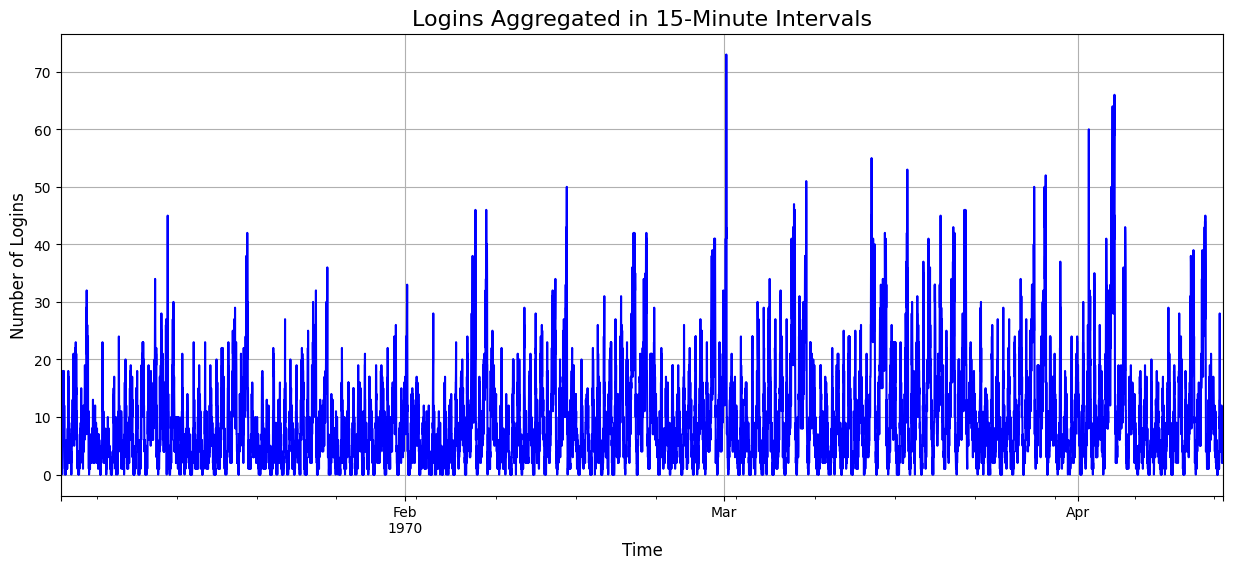

In [9]:
# Visualize the time series
plt.figure(figsize=(15, 6))
df_aggregated_15min.plot(kind='line', color='blue', label='Login Counts')
plt.title('Logins Aggregated in 15-Minute Intervals', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Logins', fontsize=12)
plt.grid()
plt.show()

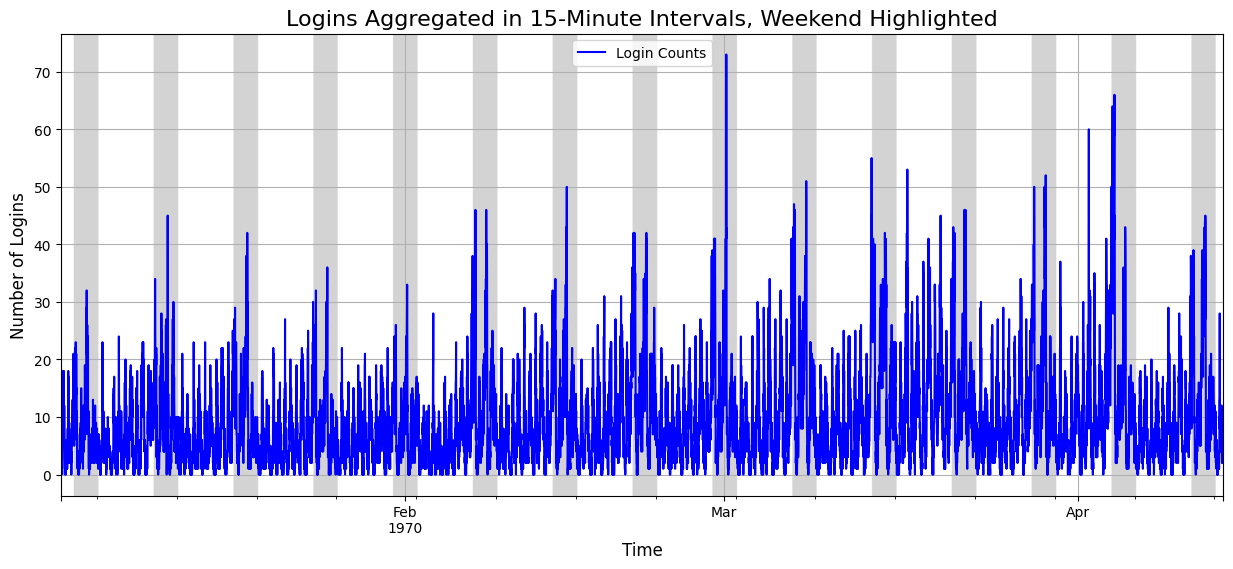

In [10]:
# view the aggregate 15 min data with weekend highlighted 

# Plot the time series
plt.figure(figsize=(15, 6))
df_aggregated_15min.plot(kind='line', color='blue', label='Login Counts')

# Highlight weekends (Saturday & Sunday)
for date in df_aggregated_15min.index:
    if date.weekday() in [5, 6]:  # 5 = Saturday, 6 = Sunday
        plt.axvspan(date, date + pd.Timedelta(minutes=15), color='lightgray', alpha=0.5)

# Add labels
plt.title('Logins Aggregated in 15-Minute Intervals, Weekend Highlighted', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Logins', fontsize=12)
plt.grid()
plt.legend()
plt.show()

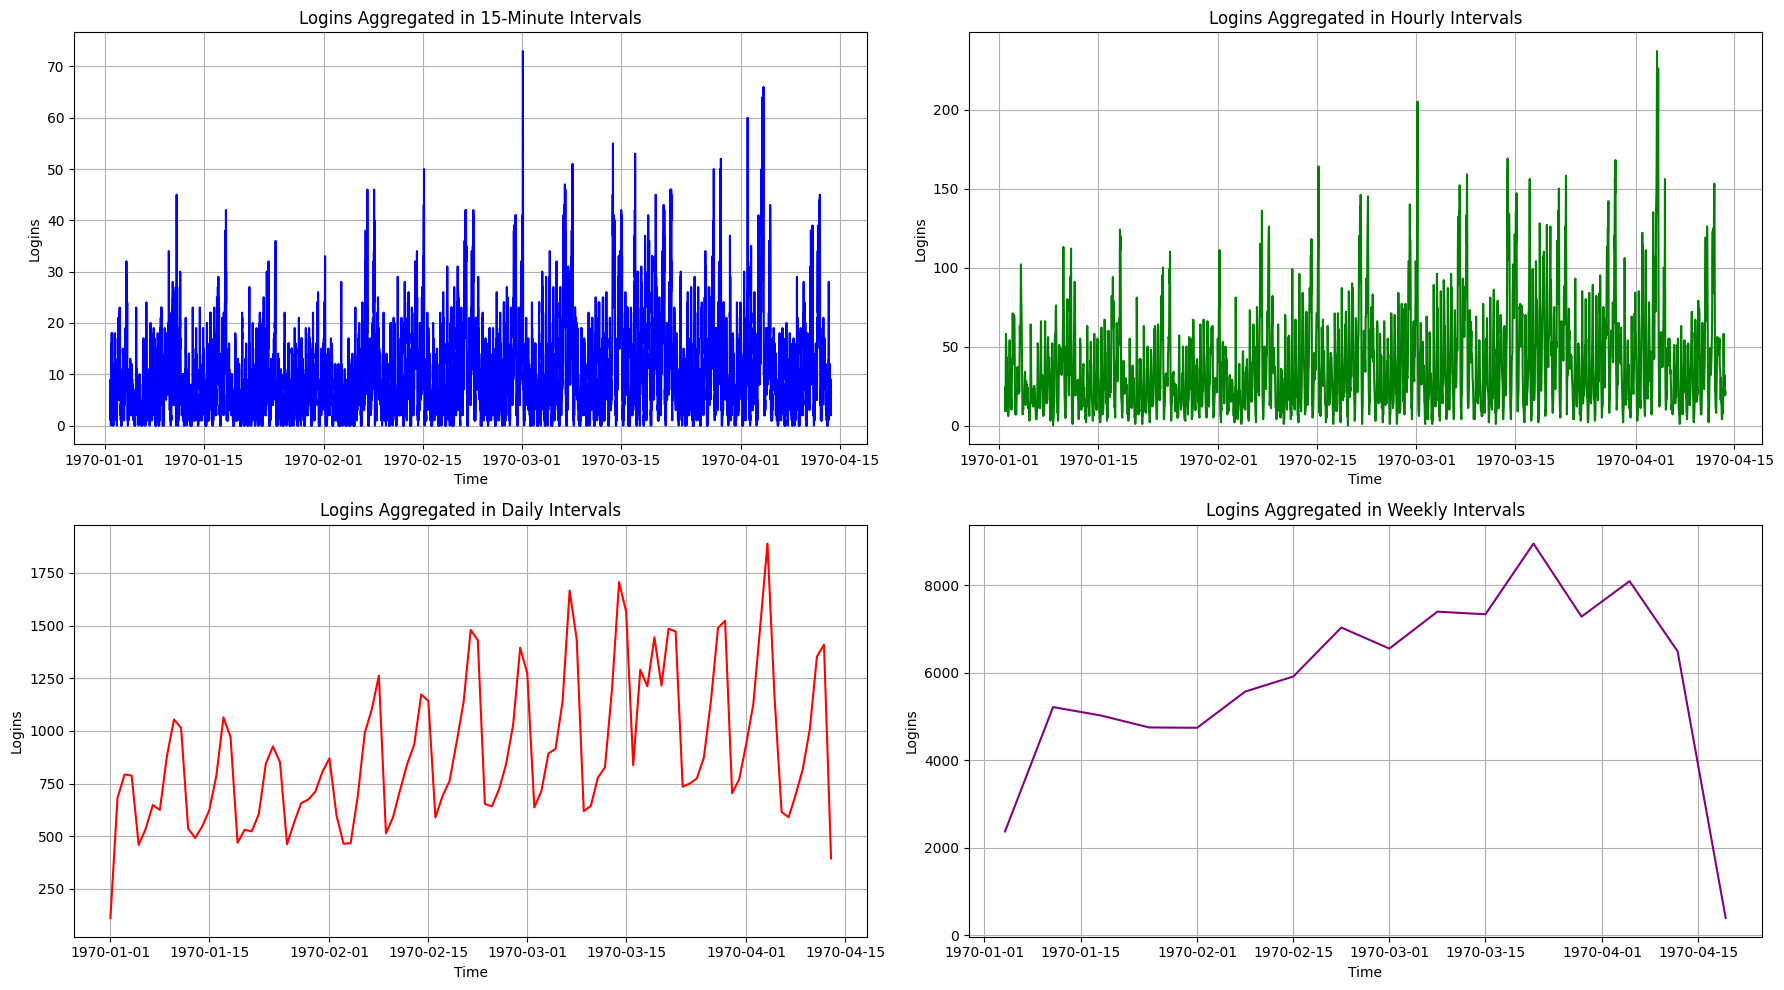

In [11]:
# View data in differnet aggregate formats 

# Create subplots (2x2 grid)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# 15-minute interval
df_15min = df.resample('15T').size()
ax1.plot(df_15min, color='blue')
ax1.set(xlabel='Time', ylabel='Logins', title='Logins Aggregated in 15-Minute Intervals')
ax1.grid()

# Hourly interval
df_hourly = df.resample('H').size()
ax2.plot(df_hourly, color='green')
ax2.set(xlabel='Time', ylabel='Logins', title='Logins Aggregated in Hourly Intervals')
ax2.grid()

# Daily interval
df_daily = df.resample('D').size()
ax3.plot(df_daily, color='red')
ax3.set(xlabel='Time', ylabel='Logins', title='Logins Aggregated in Daily Intervals')
ax3.grid()

# Weekly interval
df_weekly = df.resample('W').size()
ax4.plot(df_weekly, color='purple')
ax4.set(xlabel='Time', ylabel='Logins', title='Logins Aggregated in Weekly Intervals')
ax4.grid()

# Adjust layout
plt.tight_layout()
plt.show()

# Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
- 1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

    __To test if reimbursing the toll for driver partners would encourage them to drive between cities more, the metric I would be looking for to measure success would be__
    
    __('avg cross trips among drivers after change' - 'avg cross trips among drivers before change') / 'avg cross trips among drivers before change' * 100%__

    __How the equation work is to get the difference before and after the experiment, then divide the difference among before converts it from raw difference to a value that has relative change which is more useful to see how effective this program was.__

- 2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
    - a) how you will implement the experiment

        __Probably will do A/B testing and test for couple of weeks like 8 weeks.__

    - b) what statistical test(s) you will conduct to verify the significance of the observation

        __Will do the 2 sample T tests to compare the Control group (before toll reimbursement) and the Test group (with toll reimbursement) as T tests as used for comparing the averages of different sample groups.__

        __And Chi Square tests for the proportion of drivers who take at least on cross city trip. This is to see if there is a correlation of drivers engaging cross city behavior due to this new policy.__

    - c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

        __If the tests show not much improvement then toll reimbursement alone may not be enough to change driver behavior. We would then have to see other reasons like other deterrent or driver behavior like preferring familiar driving areas and schedules.__

        __If tests show improvement then the toll reimbursement method is a great incentive.__

Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do
not need this information to answer Part 2

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).


Testing